In [2]:
import scipy.stats as ss
import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals

%matplotlib notebook

## Example of n coin flips

In [3]:
# create beta prior and likelihood and posterior
N = 100
a, b = 2,2
prior = ss.beta(2,2) # assume a fair coin
likelihood = lambda p: ss.binom(N, p)
posterior = lambda x: ss.beta(a + x, b + N - x)

# create simulator
def simulator(p, size=1):
    global N
    return ss.binom(N, p).rvs(size)

<IPython.core.display.Javascript object>


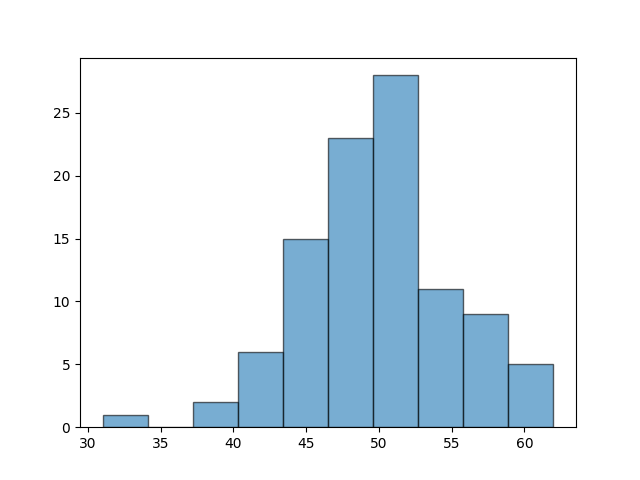

In [4]:
# what does the simulator produce?
plt.figure()
plt.hist(simulator(0.5, N), alpha=0.6, edgecolor="k")
plt.show()

# observation
X = simulator(0.2)

<IPython.core.display.Javascript object>


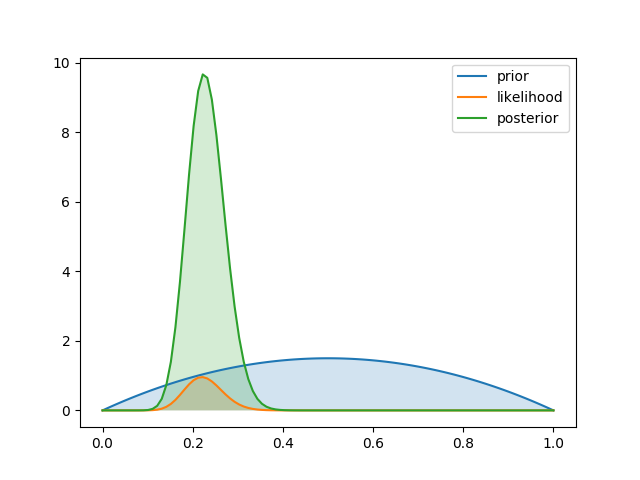

In [35]:
# what does the prior, likelihood and posterior look like?
plt.figure()
x = np.linspace(0,1, 100)

y = prior.pdf(x)
plt.plot(x,y, label="prior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

scale = 10
y = scale * likelihood(x).pmf(X)
plt.plot(x,y, label="likelihood"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

y = posterior(X).pdf(x)
plt.plot(x,y, label="posterior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

plt.legend()
plt.show()

## Use our ABC package

In [5]:
# now ABC
# create priorww
prior = pyabc.Prior("beta", 2, 2, name="p")

# sample and pdf of prior class
...

Ellipsis

In [7]:
# create sampler
rej = pyabc.RejectionSampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)
mcmc = pyabc.MCMCSampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)
smc = pyabc.SMCSampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)
abcde = pyabc.ABCDESampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)
bolfi = pyabc.BOLFI(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X, domain=[(0,1)])

In [ ]:
rej.sample(nr_samples=200, threshold=0)
mcmc.sample(nr_samples=200, threshold=0, step_size=[0.1])
smc.sample(nr_samples=200, thresholds=[2,1,0.5,0])
abcde.sample(nr_samples=200, nr_iter=100, burn_in=100, nr_groups=5, alpha=0.1, beta=0.1, kappa=0.9)

In [24]:
bolfi.sample(nr_samples=100, threshold=0, n_chains=4, burn_in=1)

BOLFI sampler started with threshold: 0 and number of samples: 100
Starting Bayesian Optimization
Starting MCMC sampling with approximative likelihood
Samples:    100 - Threshold: keiner - Iterations:        104 - Acceptance rate: 0.846154 - Time:   216.38 s


In [14]:
# and add posterior
def plot_posterior():
    x = np.linspace(0,1, 100)
    y = posterior(X).pdf(x)
    plt.plot(x,y, "-m", label='closed-form posterior')
    plt.legend()

<IPython.core.display.Javascript object>


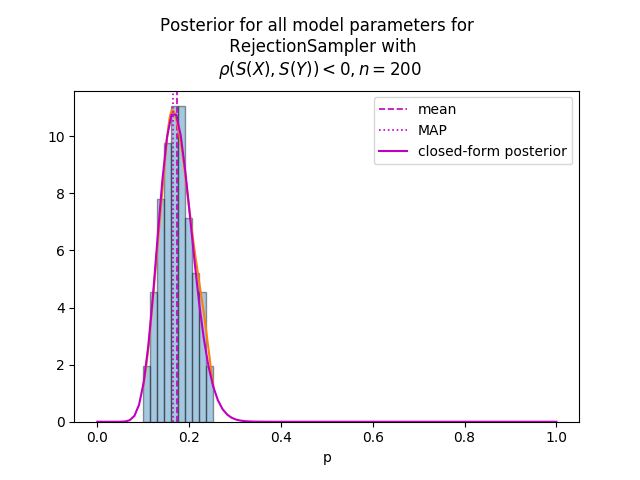

<IPython.core.display.Javascript object>


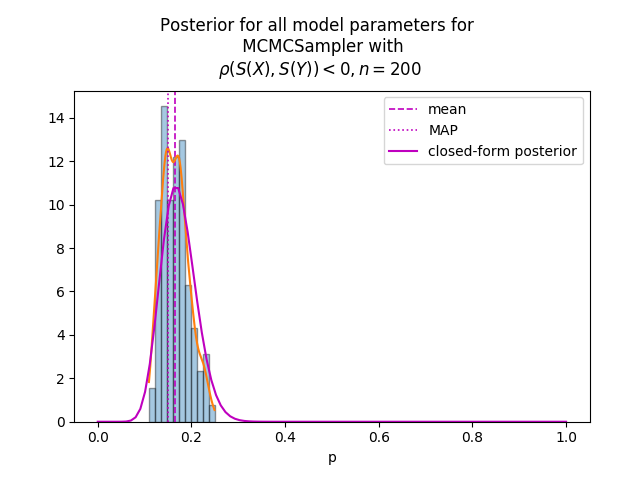

<IPython.core.display.Javascript object>


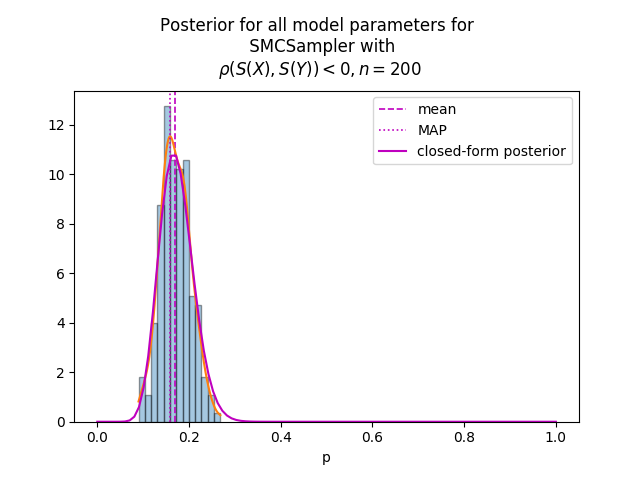

<IPython.core.display.Javascript object>


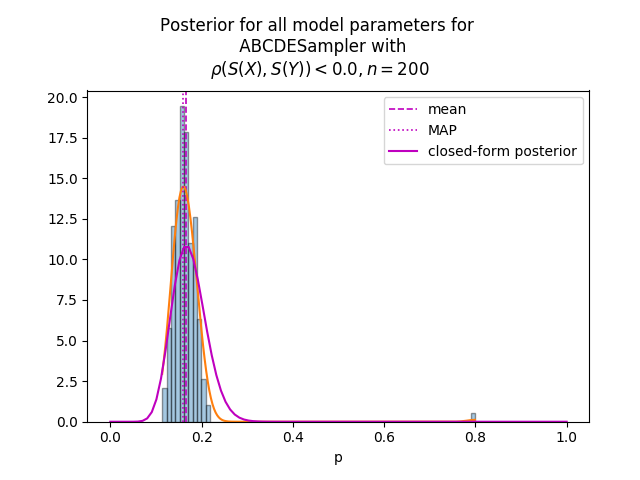

<IPython.core.display.Javascript object>


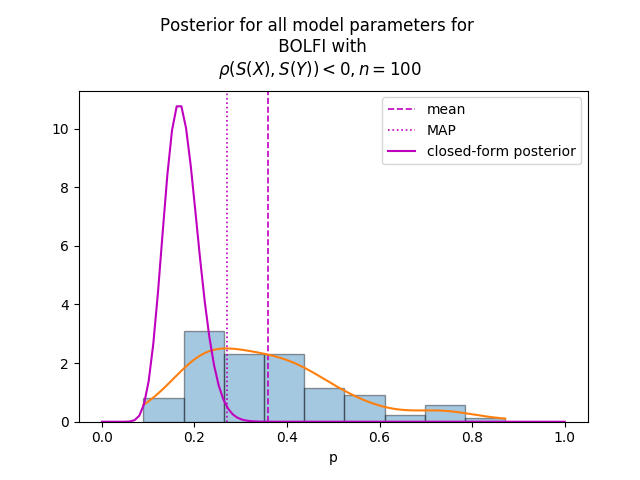

In [25]:
# plot marginals and posterior
fig = plot_marginals(rej)
plot_posterior()

fig = plot_marginals(mcmc)
plot_posterior()

fig = plot_marginals(smc)
plot_posterior()

fig = plot_marginals(abcde)
plot_posterior()

fig = plot_marginals(bolfi)
plot_posterior()

In [12]:
# and add posterior
x = np.linspace(0,1, 100)
y = posterior(X).pdf(x)
plt.plot(x,y, "-m", label='closed-form posterior')
plt.legend()

In [40]:
# sample exact
rej.sample(nr_samples=1000, threshold=0)

Rejection sampler started with threshold: 0 and number of samples: 1000
Samples:   1000 - Threshold: 0.0000 - Iterations:     103000 - Acceptance rate: 0.009709 - Time:    56.31 s


<IPython.core.display.Javascript object>


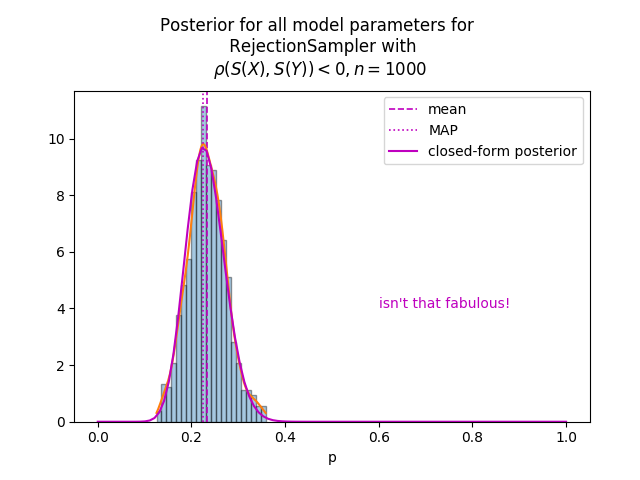

Text(0.6,4,"isn't that fabulous!")

In [48]:
# plot marginals and posterior
fig = plot_marginals(rej)

# and add posterior
x = np.linspace(0,1, 100)
y = posterior(X).pdf(x)
plt.plot(x,y, "-m", label='closed-form posterior')
plt.legend()

plt.annotate("isn't that fabulous!", xy=(0.6, 4), xytext=(0.6, 4), color="m")